<a href="https://colab.research.google.com/github/ygeszvain/projects/blob/master/Housing_Value_Zillow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fbprophet

In [0]:
import timeit
%matplotlib inline
import pandas as pd
from fbprophet import Prophet

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
# OBTAIN

df = pd.read_csv('https://files.zillowstatic.com/research/public/Zip/Zip_Zhvi_SingleFamilyResidence.csv', sep=',', error_bad_lines=False, encoding = "ISO-8859-1")
df.head(20)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03
0,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,1,337200.0,338200.0,339000.0,...,1043100,1043900,1045300,1048400,1050600,1049700,1049900,1053700,1060100,1063400
1,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,2,210400.0,212200.0,212200.0,...,335800,336900,338400,338600,337000,336100,335900,335200,334000,333000
2,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,3,502900.0,504900.0,506300.0,...,1323800,1322100,1321500,1320100,1319600,1321400,1324800,1329900,1337300,1339900
3,91940,77449,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,95400.0,95600.0,95800.0,...,176800,177400,178100,178700,179500,180300,181000,182000,183100,183600
4,93144,79936,El Paso,TX,El Paso,El Paso County,5,77300.0,77300.0,77300.0,...,123000,123700,124600,125700,126400,126800,127600,128100,128600,129000
5,91733,77084,Houston,TX,Houston-The Woodlands-Sugar Land,Harris County,6,95000.0,95200.0,95400.0,...,166200,167500,168700,169600,170900,172400,173900,175600,177400,178300
6,61807,10467,New York,NY,New York-Newark-Jersey City,Bronx County,7,151900.0,151800.0,151800.0,...,425300,429500,433100,434200,435100,438200,443000,446900,451200,454800
7,62037,11226,New York,NY,New York-Newark-Jersey City,Kings County,8,161800.0,162200.0,162500.0,...,1027600,1063500,1094800,1115500,1126000,1119800,1094200,1058500,1034900,1030000
8,84640,60640,Chicago,IL,Chicago-Naperville-Elgin,Cook County,9,218500.0,218500.0,218500.0,...,777100,762900,758500,756800,749400,746100,749500,753000,759000,765000
9,97564,94109,San Francisco,CA,San Francisco-Oakland-Hayward,San Francisco County,10,767700.0,772800.0,778000.0,...,3929400,3967200,3976600,3983800,3999700,3992500,3996500,3993500,3951800,3899100


In [5]:
# review null values in df

df.apply(lambda x: sum(x.isnull()),axis=0)

RegionID         0
RegionName       0
City             0
State            0
Metro         1357
CountyName       0
SizeRank         0
1996-04       1172
1996-05       1172
1996-06       1172
1996-07       1172
1996-08       1172
1996-09       1172
1996-10       1172
1996-11       1172
1996-12       1172
1997-01       1172
1997-02       1172
1997-03       1172
1997-04       1172
1997-05       1172
1997-06       1172
1997-07       1171
1997-08       1171
1997-09       1171
1997-10       1171
1997-11       1171
1997-12       1171
1998-01       1169
1998-02       1169
              ... 
2016-10          0
2016-11          0
2016-12          0
2017-01          0
2017-02          0
2017-03          0
2017-04          0
2017-05          0
2017-06          0
2017-07          0
2017-08          0
2017-09          0
2017-10          0
2017-11          0
2017-12          0
2018-01          0
2018-02          0
2018-03          0
2018-04          0
2018-05          0
2018-06          0
2018-07     

In [0]:
# Drop all nan
data = df.dropna()

In [7]:
data.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03
0,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,1,337200.0,338200.0,339000.0,...,1043100,1043900,1045300,1048400,1050600,1049700,1049900,1053700,1060100,1063400
1,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,2,210400.0,212200.0,212200.0,...,335800,336900,338400,338600,337000,336100,335900,335200,334000,333000
2,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,3,502900.0,504900.0,506300.0,...,1323800,1322100,1321500,1320100,1319600,1321400,1324800,1329900,1337300,1339900
3,91940,77449,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,95400.0,95600.0,95800.0,...,176800,177400,178100,178700,179500,180300,181000,182000,183100,183600
4,93144,79936,El Paso,TX,El Paso,El Paso County,5,77300.0,77300.0,77300.0,...,123000,123700,124600,125700,126400,126800,127600,128100,128600,129000


In [8]:
data.shape

(13266, 283)

In [10]:
data['RegionID'] = data.RegionID.astype(str)
data['RegionName'] = data.RegionName.astype(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
data.dtypes

RegionID       object
RegionName     object
City           object
State          object
Metro          object
CountyName     object
SizeRank        int64
1996-04       float64
1996-05       float64
1996-06       float64
1996-07       float64
1996-08       float64
1996-09       float64
1996-10       float64
1996-11       float64
1996-12       float64
1997-01       float64
1997-02       float64
1997-03       float64
1997-04       float64
1997-05       float64
1997-06       float64
1997-07       float64
1997-08       float64
1997-09       float64
1997-10       float64
1997-11       float64
1997-12       float64
1998-01       float64
1998-02       float64
               ...   
2016-10         int64
2016-11         int64
2016-12         int64
2017-01         int64
2017-02         int64
2017-03         int64
2017-04         int64
2017-05         int64
2017-06         int64
2017-07         int64
2017-08         int64
2017-09         int64
2017-10         int64
2017-11         int64
2017-12   

In [12]:
data[data['State'].str.contains("WI")] 

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03
478,81422,53704,Madison,WI,Madison,Dane County,479,101600.0,102500.0,103400.0,...,220200,221000,221800,222900,224300,225900,227500,229200,230800,231900
535,81427,53711,Madison,WI,Madison,Dane County,536,135100.0,135500.0,135900.0,...,297900,299000,300600,303000,305000,306500,307900,308900,310400,312000
570,81782,54601,La Crosse,WI,La Crosse-Onalaska,La Crosse County,571,83800.0,82500.0,81400.0,...,151300,151700,151700,152300,153600,154800,156100,157700,159100,159900
852,82001,54956,Neenah,WI,Oshkosh-Neenah,Winnebago County,853,117400.0,116800.0,116200.0,...,195900,197500,199600,201900,204000,205000,205500,206200,208200,210500
903,81563,54115,De Pere,WI,Green Bay,Brown County,904,105100.0,105800.0,106500.0,...,221300,222300,223500,224700,226100,228000,229800,230700,231700,233300
1001,81295,53215,Milwaukee,WI,Milwaukee-Waukesha-West Allis,Milwaukee County,1002,60400.0,60600.0,60800.0,...,109100,110800,112300,113200,114000,114800,116100,117700,119400,120200
1018,81843,54703,Eau Claire,WI,Eau Claire,Eau Claire County,1019,95200.0,94600.0,93900.0,...,152400,152700,153000,154000,155700,157100,157400,156800,156100,155900
1030,81421,53703,Madison,WI,Madison,Dane County,1031,122000.0,121900.0,121900.0,...,339600,339400,339000,339600,342800,348500,354500,358800,361900,364000
1074,81986,54935,Fond du Lac,WI,Fond du Lac,Fond du Lac County,1075,82800.0,83400.0,83900.0,...,114300,114500,113300,113200,115000,116700,117600,118100,118100,117900
1081,81282,53202,Milwaukee,WI,Milwaukee-Waukesha-West Allis,Milwaukee County,1082,70100.0,70700.0,71200.0,...,205700,207100,209100,209800,210500,212200,214600,216400,219400,222300


In [13]:
data.loc[data['City'] == 'Milwaukee']

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03
1001,81295,53215,Milwaukee,WI,Milwaukee-Waukesha-West Allis,Milwaukee County,1002,60400.0,60600.0,60800.0,...,109100,110800,112300,113200,114000,114800,116100,117700,119400,120200
1081,81282,53202,Milwaukee,WI,Milwaukee-Waukesha-West Allis,Milwaukee County,1082,70100.0,70700.0,71200.0,...,205700,207100,209100,209800,210500,212200,214600,216400,219400,222300
1423,81287,53207,Milwaukee,WI,Milwaukee-Waukesha-West Allis,Milwaukee County,1424,84500.0,84200.0,83900.0,...,164300,164600,165400,165900,166000,166100,166600,167600,169800,171400
1558,81301,53221,Milwaukee,WI,Milwaukee-Waukesha-West Allis,Milwaukee County,1559,101500.0,101400.0,101300.0,...,159100,159900,160700,161100,161500,162200,163000,163600,165300,166800
1912,81299,53219,Milwaukee,WI,Milwaukee-Waukesha-West Allis,Milwaukee County,1913,86800.0,87200.0,87600.0,...,138700,139200,139700,139800,140100,140700,141500,142700,145000,146700
2162,81298,53218,Milwaukee,WI,Milwaukee-Waukesha-West Allis,Milwaukee County,2163,47800.0,47900.0,48100.0,...,69900,70500,71400,72600,73900,75000,75700,76500,78100,79400
2630,81288,53208,Milwaukee,WI,Milwaukee-Waukesha-West Allis,Milwaukee County,2631,63600.0,62900.0,62200.0,...,123300,124500,125200,125400,126100,128100,129900,132000,135200,138100
2812,81296,53216,Milwaukee,WI,Milwaukee-Waukesha-West Allis,Milwaukee County,2813,49900.0,50100.0,50300.0,...,77100,79000,80200,80400,81300,82600,83300,83800,85400,86700
3141,81303,53223,Milwaukee,WI,Milwaukee-Waukesha-West Allis,Milwaukee County,3142,89500.0,90200.0,90900.0,...,143900,143100,142200,142100,142700,143300,143400,143700,145200,146200
3887,81302,53222,Milwaukee,WI,Milwaukee-Waukesha-West Allis,Milwaukee County,3888,81300.0,81500.0,81800.0,...,139800,140900,142200,143100,143800,144700,145900,147600,150000,151500


In [0]:
MIL = data.loc[data['City'] == 'Milwaukee']

MIL =MIL.groupby(['City','State'])['1997-01','1997-02','1997-03','1997-04','1997-05','1997-06','1997-07','1997-08','1997-09','1997-10','1997-11','1997-12',
                             '1998-01','1998-02','1998-03','1998-04','1998-05','1998-06','1998-07','1998-08','1998-09','1998-10','1998-11','1998-12',
                             '1999-01','1999-02','1999-03','1999-04','1999-05','1999-06','1999-07','1999-08','1999-09','1999-10','1999-11','1999-12',
                             '2000-01','2000-02','2000-03','2000-04','2000-05','2000-06','2000-07','2000-08','2000-09','2000-10','2000-11','2000-12',
                             '2001-01','2001-02','2001-03','2001-04','2001-05','2001-06','2001-07','2001-08','2001-09','2001-10','2001-11','2001-12',
                             '2002-01','2002-02','2002-03','2002-04','2002-05','2002-06','2002-07','2002-08','2002-09','2002-10','2002-11','2002-12',
                             '2003-01','2003-02','2003-03','2003-04','2003-05','2003-06','2003-07','2003-08','2003-09','2003-10','2003-11','2003-12',
                             '2004-01','2004-02','2004-03','2004-04','2004-05','2004-06','2004-07','2004-08','2004-09','2004-10','2004-11','2004-12',
                             '2005-01','2005-02','2005-03','2005-04','2005-05','2005-06','2005-07','2005-08','2005-09','2005-10','2005-11','2005-12',
                             '2006-01','2006-02','2006-03','2006-04','2006-05','2006-06','2006-07','2006-08','2006-09','2006-10','2006-11','2006-12',
                             '2007-01','2007-02','2007-03','2007-04','2007-05','2007-06','2007-07','2007-08','2007-09','2007-10','2007-11','2007-12',
                             '2008-01','2008-02','2008-03','2008-04','2008-05','2008-06','2008-07','2008-08','2008-09','2008-10','2008-11','2008-12',
                             '2009-01','2009-02','2009-03','2009-04','2009-05','2009-06','2009-07','2009-08','2009-09','2009-10','2009-11','2009-12',
                             '2010-01','2010-02','2010-03','2010-04','2010-05','2010-06','2010-07','2010-08','2010-09','2010-10','2010-11','2010-12',
                             '2011-01','2011-02','2011-03','2011-04','2011-05','2011-06','2011-07','2011-08','2011-09','2011-10','2011-11','2011-12',
                             '2012-01','2012-02','2012-03','2012-04','2012-05','2012-06','2012-07','2012-08','2012-09','2012-10','2012-11','2012-12',
                             '2013-01','2013-02','2013-03','2013-04','2013-05','2013-06','2013-07','2013-08','2013-09','2013-10','2013-11','2013-12',
                             '2014-01','2014-02','2014-03','2014-04','2014-05','2014-06','2014-07','2014-08','2014-09','2014-10','2014-11','2014-12',
                             '2015-01','2015-02','2015-03','2015-04','2015-05','2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12',
                             '2016-01','2016-02','2016-03','2016-04','2016-05','2016-06','2016-07','2016-08','2016-09','2016-10','2016-11','2016-12',
                             '2017-01','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07','2017-08','2017-09','2017-10','2017-11','2017-12',
                             '2018-01','2018-02','2018-03','2018-04','2018-05','2018-06','2018-07','2018-08','2018-09','2018-10','2018-11','2018-12',
                             '2019-01','2019-02','2019-03'].mean()

In [19]:
MIL = pd.melt(MIL, value_vars=['1997-01','1997-02','1997-03','1997-04','1997-05','1997-06','1997-07','1997-08','1997-09','1997-10','1997-11','1997-12',
                             '1998-01','1998-02','1998-03','1998-04','1998-05','1998-06','1998-07','1998-08','1998-09','1998-10','1998-11','1998-12',
                             '1999-01','1999-02','1999-03','1999-04','1999-05','1999-06','1999-07','1999-08','1999-09','1999-10','1999-11','1999-12',
                             '2000-01','2000-02','2000-03','2000-04','2000-05','2000-06','2000-07','2000-08','2000-09','2000-10','2000-11','2000-12',
                             '2001-01','2001-02','2001-03','2001-04','2001-05','2001-06','2001-07','2001-08','2001-09','2001-10','2001-11','2001-12',
                             '2002-01','2002-02','2002-03','2002-04','2002-05','2002-06','2002-07','2002-08','2002-09','2002-10','2002-11','2002-12',
                             '2003-01','2003-02','2003-03','2003-04','2003-05','2003-06','2003-07','2003-08','2003-09','2003-10','2003-11','2003-12',
                             '2004-01','2004-02','2004-03','2004-04','2004-05','2004-06','2004-07','2004-08','2004-09','2004-10','2004-11','2004-12',
                             '2005-01','2005-02','2005-03','2005-04','2005-05','2005-06','2005-07','2005-08','2005-09','2005-10','2005-11','2005-12',
                             '2006-01','2006-02','2006-03','2006-04','2006-05','2006-06','2006-07','2006-08','2006-09','2006-10','2006-11','2006-12',
                             '2007-01','2007-02','2007-03','2007-04','2007-05','2007-06','2007-07','2007-08','2007-09','2007-10','2007-11','2007-12',
                             '2008-01','2008-02','2008-03','2008-04','2008-05','2008-06','2008-07','2008-08','2008-09','2008-10','2008-11','2008-12',
                             '2009-01','2009-02','2009-03','2009-04','2009-05','2009-06','2009-07','2009-08','2009-09','2009-10','2009-11','2009-12',
                             '2010-01','2010-02','2010-03','2010-04','2010-05','2010-06','2010-07','2010-08','2010-09','2010-10','2010-11','2010-12',
                             '2011-01','2011-02','2011-03','2011-04','2011-05','2011-06','2011-07','2011-08','2011-09','2011-10','2011-11','2011-12',
                             '2012-01','2012-02','2012-03','2012-04','2012-05','2012-06','2012-07','2012-08','2012-09','2012-10','2012-11','2012-12',
                             '2013-01','2013-02','2013-03','2013-04','2013-05','2013-06','2013-07','2013-08','2013-09','2013-10','2013-11','2013-12',
                             '2014-01','2014-02','2014-03','2014-04','2014-05','2014-06','2014-07','2014-08','2014-09','2014-10','2014-11','2014-12',
                             '2015-01','2015-02','2015-03','2015-04','2015-05','2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12',
                             '2016-01','2016-02','2016-03','2016-04','2016-05','2016-06','2016-07','2016-08','2016-09','2016-10','2016-11','2016-12',
                             '2017-01','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07','2017-08','2017-09','2017-10','2017-11','2017-12',
                             '2018-01','2018-02','2018-03','2018-04','2018-05','2018-06','2018-07','2018-08','2018-09','2018-10','2018-11','2018-12',
                             '2019-01','2019-02','2019-03'])

MIL

,variable,value
0,1997-01,74846.153846
1,1997-02,75069.230769
2,1997-03,75246.153846
3,1997-04,75423.076923
4,1997-05,75607.692308
5,1997-06,75807.692308
6,1997-07,76015.384615
7,1997-08,76253.846154
8,1997-09,76515.384615
9,1997-10,76784.615385


In [20]:
MIL = MIL.rename(index=str, columns={"value": "y", "variable": "ds"})
MIL.head()

,ds,y
0,1997-01,74846.153846
1,1997-02,75069.230769
2,1997-03,75246.153846
3,1997-04,75423.076923
4,1997-05,75607.692308


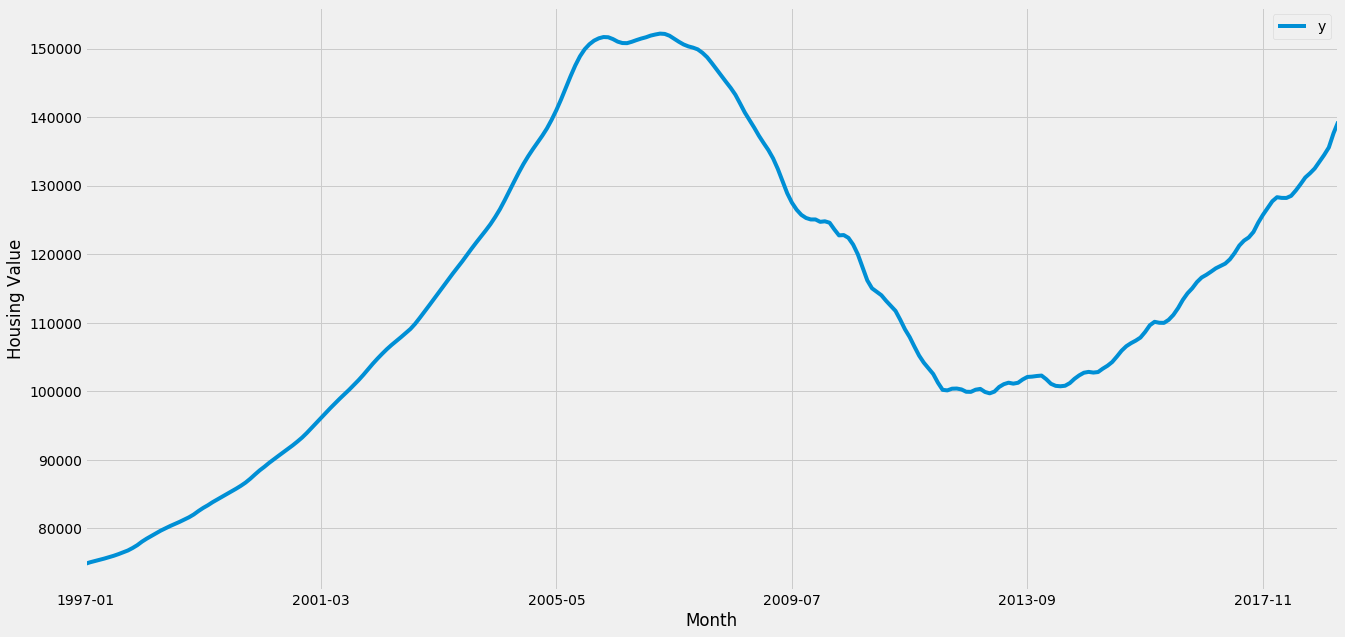

In [22]:
ax = MIL.set_index('ds').plot(figsize=(20, 10))
ax.set_ylabel('Housing Value')
ax.set_xlabel('Month')

plt.show()

In [23]:
MIL.dtypes

ds     object
y     float64
dtype: object

In [24]:
# MODEL
# Set the uncertainty interval to 95% (the Prophet default is 80%)

bev_model = Prophet(interval_width=0.95)
bev_model.fit(MIL)

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
future_dates = bev_model.make_future_dataframe(periods=24, freq='M')
future_dates.tail()

,ds
286,2020-10-31
287,2020-11-30
288,2020-12-31
289,2021-01-31
290,2021-02-28


In [29]:
# MODEL

forecast = bev_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
286,2020-10-31,148717.161943,139059.597877,159224.582390
287,2020-11-30,149277.613992,138338.614329,160499.881765
288,2020-12-31,149635.799920,137875.351085,161910.620136
289,2021-01-31,149929.975232,137447.974561,162610.572948
290,2021-02-28,151920.158194,139375.746915,165907.733228


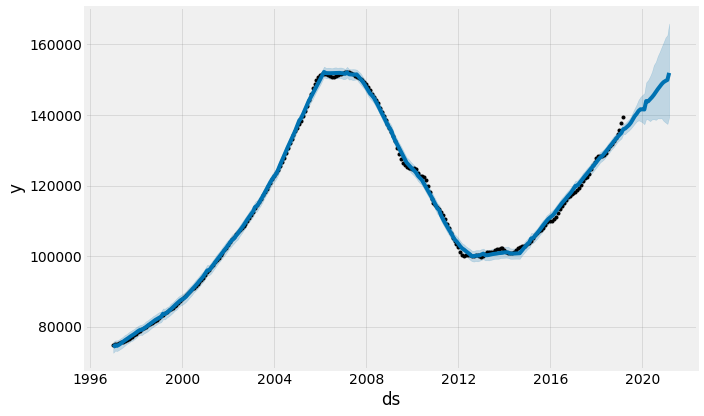

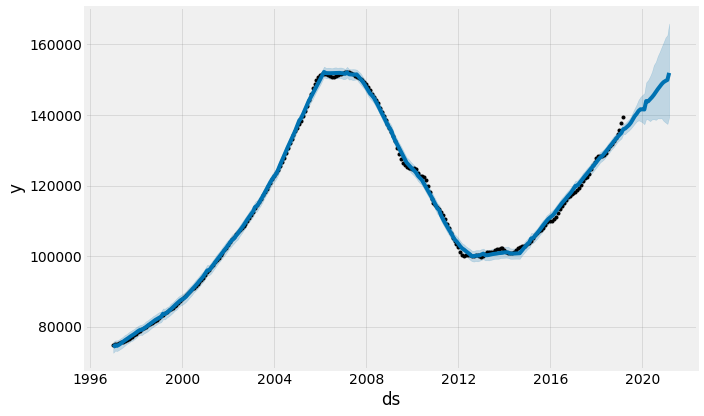

In [30]:
# MODEL

bev_model.plot(forecast, uncertainty=True)

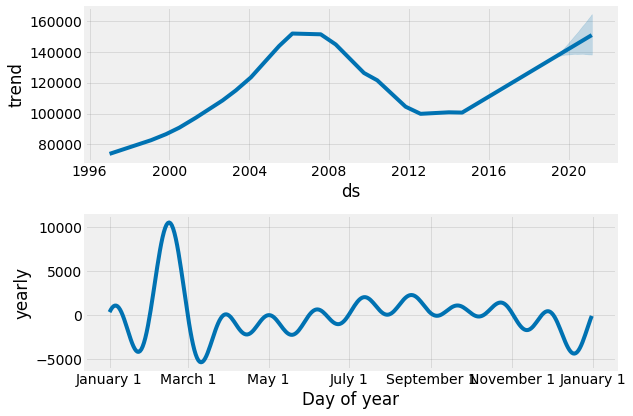

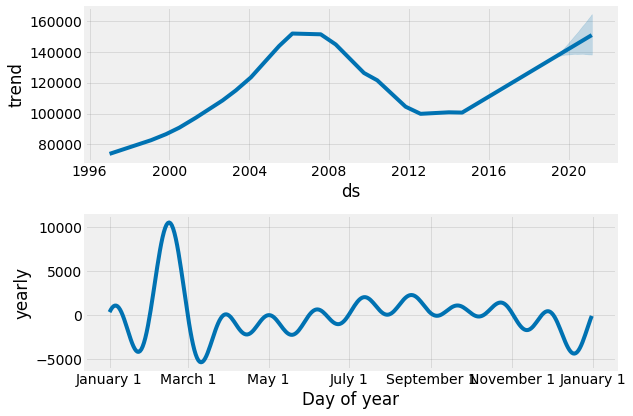

In [31]:
# INTERPRET

bev_model.plot_components(forecast)


In [32]:
data.loc[data['City'] == 'Menomonee Falls']

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03
1608,81176,53051,Menomonee Falls,WI,Milwaukee-Waukesha-West Allis,Waukesha County,1609,127300.0,127500.0,128000.0,...,253800,254800,255800,257200,257800,258700,261400,264000,265600,266400


In [0]:
MENF = data.loc[(data['City'] == 'Menomonee Falls') & (data['State'] == 'WI')]

MENF = MENF.groupby(['City','State'])['1997-01','1997-02','1997-03','1997-04','1997-05','1997-06','1997-07','1997-08','1997-09','1997-10','1997-11','1997-12',
                             '1998-01','1998-02','1998-03','1998-04','1998-05','1998-06','1998-07','1998-08','1998-09','1998-10','1998-11','1998-12',
                             '1999-01','1999-02','1999-03','1999-04','1999-05','1999-06','1999-07','1999-08','1999-09','1999-10','1999-11','1999-12',
                             '2000-01','2000-02','2000-03','2000-04','2000-05','2000-06','2000-07','2000-08','2000-09','2000-10','2000-11','2000-12',
                             '2001-01','2001-02','2001-03','2001-04','2001-05','2001-06','2001-07','2001-08','2001-09','2001-10','2001-11','2001-12',
                             '2002-01','2002-02','2002-03','2002-04','2002-05','2002-06','2002-07','2002-08','2002-09','2002-10','2002-11','2002-12',
                             '2003-01','2003-02','2003-03','2003-04','2003-05','2003-06','2003-07','2003-08','2003-09','2003-10','2003-11','2003-12',
                             '2004-01','2004-02','2004-03','2004-04','2004-05','2004-06','2004-07','2004-08','2004-09','2004-10','2004-11','2004-12',
                             '2005-01','2005-02','2005-03','2005-04','2005-05','2005-06','2005-07','2005-08','2005-09','2005-10','2005-11','2005-12',
                             '2006-01','2006-02','2006-03','2006-04','2006-05','2006-06','2006-07','2006-08','2006-09','2006-10','2006-11','2006-12',
                             '2007-01','2007-02','2007-03','2007-04','2007-05','2007-06','2007-07','2007-08','2007-09','2007-10','2007-11','2007-12',
                             '2008-01','2008-02','2008-03','2008-04','2008-05','2008-06','2008-07','2008-08','2008-09','2008-10','2008-11','2008-12',
                             '2009-01','2009-02','2009-03','2009-04','2009-05','2009-06','2009-07','2009-08','2009-09','2009-10','2009-11','2009-12',
                             '2010-01','2010-02','2010-03','2010-04','2010-05','2010-06','2010-07','2010-08','2010-09','2010-10','2010-11','2010-12',
                             '2011-01','2011-02','2011-03','2011-04','2011-05','2011-06','2011-07','2011-08','2011-09','2011-10','2011-11','2011-12',
                             '2012-01','2012-02','2012-03','2012-04','2012-05','2012-06','2012-07','2012-08','2012-09','2012-10','2012-11','2012-12',
                             '2013-01','2013-02','2013-03','2013-04','2013-05','2013-06','2013-07','2013-08','2013-09','2013-10','2013-11','2013-12',
                             '2014-01','2014-02','2014-03','2014-04','2014-05','2014-06','2014-07','2014-08','2014-09','2014-10','2014-11','2014-12',
                             '2015-01','2015-02','2015-03','2015-04','2015-05','2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12',
                             '2016-01','2016-02','2016-03','2016-04','2016-05','2016-06','2016-07','2016-08','2016-09','2016-10','2016-11','2016-12',
                             '2017-01','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07','2017-08','2017-09','2017-10','2017-11','2017-12',
                             '2018-01','2018-02','2018-03','2018-04','2018-05','2018-06','2018-07','2018-08','2018-09','2018-10','2018-11','2018-12',
                             '2019-01','2019-02','2019-03'].mean()

In [36]:
MENF = pd.melt(MENF, value_vars=['1997-01','1997-02','1997-03','1997-04','1997-05','1997-06','1997-07','1997-08','1997-09','1997-10','1997-11','1997-12',
                             '1998-01','1998-02','1998-03','1998-04','1998-05','1998-06','1998-07','1998-08','1998-09','1998-10','1998-11','1998-12',
                             '1999-01','1999-02','1999-03','1999-04','1999-05','1999-06','1999-07','1999-08','1999-09','1999-10','1999-11','1999-12',
                             '2000-01','2000-02','2000-03','2000-04','2000-05','2000-06','2000-07','2000-08','2000-09','2000-10','2000-11','2000-12',
                             '2001-01','2001-02','2001-03','2001-04','2001-05','2001-06','2001-07','2001-08','2001-09','2001-10','2001-11','2001-12',
                             '2002-01','2002-02','2002-03','2002-04','2002-05','2002-06','2002-07','2002-08','2002-09','2002-10','2002-11','2002-12',
                             '2003-01','2003-02','2003-03','2003-04','2003-05','2003-06','2003-07','2003-08','2003-09','2003-10','2003-11','2003-12',
                             '2004-01','2004-02','2004-03','2004-04','2004-05','2004-06','2004-07','2004-08','2004-09','2004-10','2004-11','2004-12',
                             '2005-01','2005-02','2005-03','2005-04','2005-05','2005-06','2005-07','2005-08','2005-09','2005-10','2005-11','2005-12',
                             '2006-01','2006-02','2006-03','2006-04','2006-05','2006-06','2006-07','2006-08','2006-09','2006-10','2006-11','2006-12',
                             '2007-01','2007-02','2007-03','2007-04','2007-05','2007-06','2007-07','2007-08','2007-09','2007-10','2007-11','2007-12',
                             '2008-01','2008-02','2008-03','2008-04','2008-05','2008-06','2008-07','2008-08','2008-09','2008-10','2008-11','2008-12',
                             '2009-01','2009-02','2009-03','2009-04','2009-05','2009-06','2009-07','2009-08','2009-09','2009-10','2009-11','2009-12',
                             '2010-01','2010-02','2010-03','2010-04','2010-05','2010-06','2010-07','2010-08','2010-09','2010-10','2010-11','2010-12',
                             '2011-01','2011-02','2011-03','2011-04','2011-05','2011-06','2011-07','2011-08','2011-09','2011-10','2011-11','2011-12',
                             '2012-01','2012-02','2012-03','2012-04','2012-05','2012-06','2012-07','2012-08','2012-09','2012-10','2012-11','2012-12',
                             '2013-01','2013-02','2013-03','2013-04','2013-05','2013-06','2013-07','2013-08','2013-09','2013-10','2013-11','2013-12',
                             '2014-01','2014-02','2014-03','2014-04','2014-05','2014-06','2014-07','2014-08','2014-09','2014-10','2014-11','2014-12',
                             '2015-01','2015-02','2015-03','2015-04','2015-05','2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12',
                             '2016-01','2016-02','2016-03','2016-04','2016-05','2016-06','2016-07','2016-08','2016-09','2016-10','2016-11','2016-12',
                             '2017-01','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07','2017-08','2017-09','2017-10','2017-11','2017-12',
                             '2018-01','2018-02','2018-03','2018-04','2018-05','2018-06','2018-07','2018-08','2018-09','2018-10','2018-11','2018-12',
                             '2019-01','2019-02','2019-03'])

MENF

,variable,value
0,1997-01,132900.0
1,1997-02,133400.0
2,1997-03,133800.0
3,1997-04,134000.0
4,1997-05,134200.0
5,1997-06,134400.0
6,1997-07,134500.0
7,1997-08,134600.0
8,1997-09,134800.0
9,1997-10,134900.0


In [37]:
MENF = MENF.rename(index=str, columns={"value": "y", "variable": "ds"})
MENF.head()

,ds,y
0,1997-01,132900.0
1,1997-02,133400.0
2,1997-03,133800.0
3,1997-04,134000.0
4,1997-05,134200.0


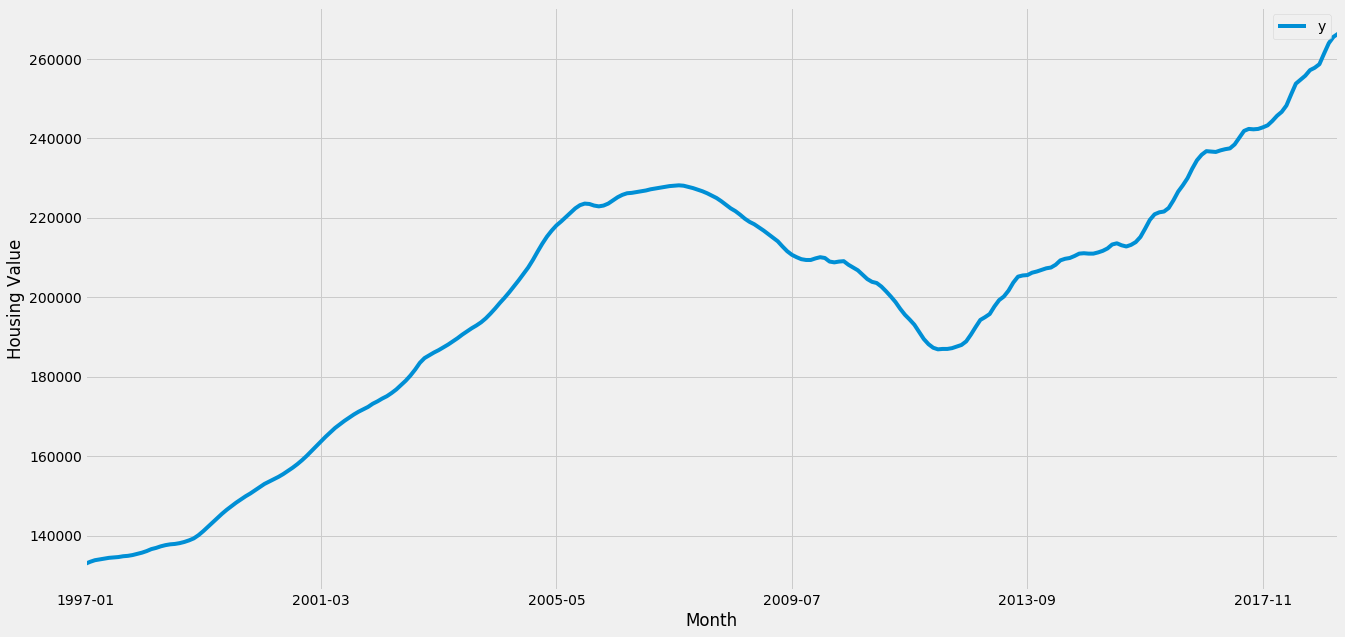

In [38]:
ax = MENF.set_index('ds').plot(figsize=(20, 10))
ax.set_ylabel('Housing Value')
ax.set_xlabel('Month')

plt.show()

In [39]:
# MODEL
# Set the uncertainty interval to 95% (the Prophet default is 80%)

bev_model = Prophet(interval_width=0.95)
bev_model.fit(MENF)

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [41]:
future_dates = bev_model.make_future_dataframe(periods=24, freq='M')
future_dates.tail()

,ds
286,2020-10-31
287,2020-11-30
288,2020-12-31
289,2021-01-31
290,2021-02-28


In [42]:
# MODEL

forecast = bev_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
286,2020-10-31,281504.345826,267377.930251,296888.943880
287,2020-11-30,282400.238005,267393.634192,297524.223856
288,2020-12-31,282997.023967,267088.703400,299447.417572
289,2021-01-31,283313.494253,265782.082447,299711.346037
290,2021-02-28,286694.340901,267508.341281,305719.318833


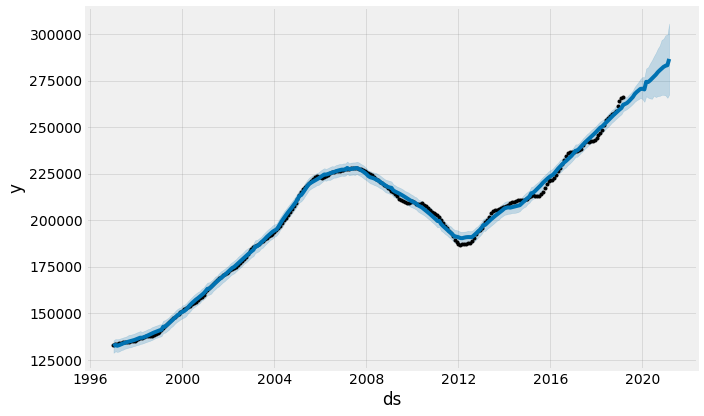

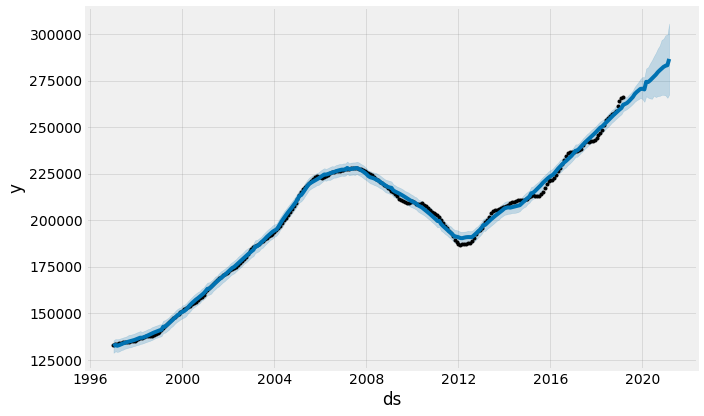

In [43]:
# MODEL

bev_model.plot(forecast, uncertainty=True)

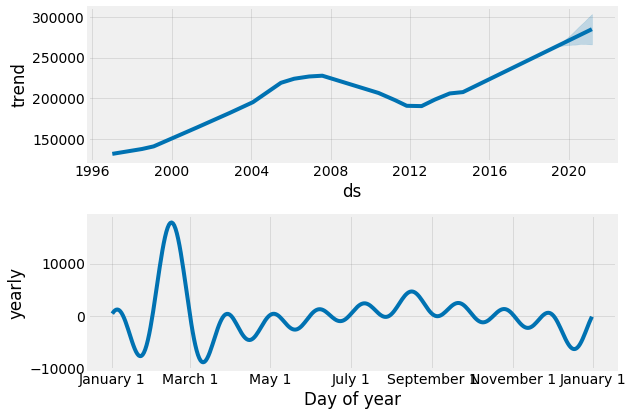

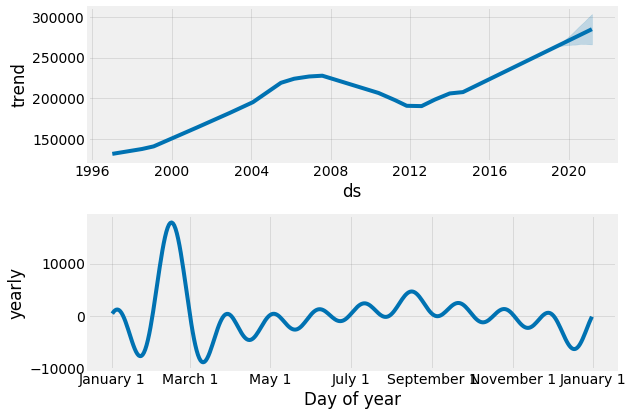

In [44]:
# INTERPRET

bev_model.plot_components(forecast)


In [45]:
data.loc[data['City'] == 'Waukesha']

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03
2017,81274,53188,Waukesha,WI,Milwaukee-Waukesha-West Allis,Waukesha County,2018,127900.0,128200.0,128700.0,...,247700,249300,250900,252200,252500,252500,253000,254200,256200,258200
2259,81272,53186,Waukesha,WI,Milwaukee-Waukesha-West Allis,Waukesha County,2260,125500.0,125600.0,125700.0,...,220400,222400,223500,224700,226000,227500,229700,231500,232700,233800
4327,81275,53189,Waukesha,WI,Milwaukee-Waukesha-West Allis,Waukesha County,4328,141200.0,141000.0,140800.0,...,298700,300000,300300,300300,300100,299900,300600,302000,303600,305100


In [0]:
WAKA = data.loc[(data['City'] == 'Waukesha') & (data['State'] == 'WI')]

WAKA = WAKA.groupby(['City','State'])['1997-01','1997-02','1997-03','1997-04','1997-05','1997-06','1997-07','1997-08','1997-09','1997-10','1997-11','1997-12',
                             '1998-01','1998-02','1998-03','1998-04','1998-05','1998-06','1998-07','1998-08','1998-09','1998-10','1998-11','1998-12',
                             '1999-01','1999-02','1999-03','1999-04','1999-05','1999-06','1999-07','1999-08','1999-09','1999-10','1999-11','1999-12',
                             '2000-01','2000-02','2000-03','2000-04','2000-05','2000-06','2000-07','2000-08','2000-09','2000-10','2000-11','2000-12',
                             '2001-01','2001-02','2001-03','2001-04','2001-05','2001-06','2001-07','2001-08','2001-09','2001-10','2001-11','2001-12',
                             '2002-01','2002-02','2002-03','2002-04','2002-05','2002-06','2002-07','2002-08','2002-09','2002-10','2002-11','2002-12',
                             '2003-01','2003-02','2003-03','2003-04','2003-05','2003-06','2003-07','2003-08','2003-09','2003-10','2003-11','2003-12',
                             '2004-01','2004-02','2004-03','2004-04','2004-05','2004-06','2004-07','2004-08','2004-09','2004-10','2004-11','2004-12',
                             '2005-01','2005-02','2005-03','2005-04','2005-05','2005-06','2005-07','2005-08','2005-09','2005-10','2005-11','2005-12',
                             '2006-01','2006-02','2006-03','2006-04','2006-05','2006-06','2006-07','2006-08','2006-09','2006-10','2006-11','2006-12',
                             '2007-01','2007-02','2007-03','2007-04','2007-05','2007-06','2007-07','2007-08','2007-09','2007-10','2007-11','2007-12',
                             '2008-01','2008-02','2008-03','2008-04','2008-05','2008-06','2008-07','2008-08','2008-09','2008-10','2008-11','2008-12',
                             '2009-01','2009-02','2009-03','2009-04','2009-05','2009-06','2009-07','2009-08','2009-09','2009-10','2009-11','2009-12',
                             '2010-01','2010-02','2010-03','2010-04','2010-05','2010-06','2010-07','2010-08','2010-09','2010-10','2010-11','2010-12',
                             '2011-01','2011-02','2011-03','2011-04','2011-05','2011-06','2011-07','2011-08','2011-09','2011-10','2011-11','2011-12',
                             '2012-01','2012-02','2012-03','2012-04','2012-05','2012-06','2012-07','2012-08','2012-09','2012-10','2012-11','2012-12',
                             '2013-01','2013-02','2013-03','2013-04','2013-05','2013-06','2013-07','2013-08','2013-09','2013-10','2013-11','2013-12',
                             '2014-01','2014-02','2014-03','2014-04','2014-05','2014-06','2014-07','2014-08','2014-09','2014-10','2014-11','2014-12',
                             '2015-01','2015-02','2015-03','2015-04','2015-05','2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12',
                             '2016-01','2016-02','2016-03','2016-04','2016-05','2016-06','2016-07','2016-08','2016-09','2016-10','2016-11','2016-12',
                             '2017-01','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07','2017-08','2017-09','2017-10','2017-11','2017-12',
                             '2018-01','2018-02','2018-03','2018-04','2018-05','2018-06','2018-07','2018-08','2018-09','2018-10','2018-11','2018-12',
                             '2019-01','2019-02','2019-03'].mean()

In [49]:
WAKA = pd.melt(WAKA, value_vars=['1997-01','1997-02','1997-03','1997-04','1997-05','1997-06','1997-07','1997-08','1997-09','1997-10','1997-11','1997-12',
                             '1998-01','1998-02','1998-03','1998-04','1998-05','1998-06','1998-07','1998-08','1998-09','1998-10','1998-11','1998-12',
                             '1999-01','1999-02','1999-03','1999-04','1999-05','1999-06','1999-07','1999-08','1999-09','1999-10','1999-11','1999-12',
                             '2000-01','2000-02','2000-03','2000-04','2000-05','2000-06','2000-07','2000-08','2000-09','2000-10','2000-11','2000-12',
                             '2001-01','2001-02','2001-03','2001-04','2001-05','2001-06','2001-07','2001-08','2001-09','2001-10','2001-11','2001-12',
                             '2002-01','2002-02','2002-03','2002-04','2002-05','2002-06','2002-07','2002-08','2002-09','2002-10','2002-11','2002-12',
                             '2003-01','2003-02','2003-03','2003-04','2003-05','2003-06','2003-07','2003-08','2003-09','2003-10','2003-11','2003-12',
                             '2004-01','2004-02','2004-03','2004-04','2004-05','2004-06','2004-07','2004-08','2004-09','2004-10','2004-11','2004-12',
                             '2005-01','2005-02','2005-03','2005-04','2005-05','2005-06','2005-07','2005-08','2005-09','2005-10','2005-11','2005-12',
                             '2006-01','2006-02','2006-03','2006-04','2006-05','2006-06','2006-07','2006-08','2006-09','2006-10','2006-11','2006-12',
                             '2007-01','2007-02','2007-03','2007-04','2007-05','2007-06','2007-07','2007-08','2007-09','2007-10','2007-11','2007-12',
                             '2008-01','2008-02','2008-03','2008-04','2008-05','2008-06','2008-07','2008-08','2008-09','2008-10','2008-11','2008-12',
                             '2009-01','2009-02','2009-03','2009-04','2009-05','2009-06','2009-07','2009-08','2009-09','2009-10','2009-11','2009-12',
                             '2010-01','2010-02','2010-03','2010-04','2010-05','2010-06','2010-07','2010-08','2010-09','2010-10','2010-11','2010-12',
                             '2011-01','2011-02','2011-03','2011-04','2011-05','2011-06','2011-07','2011-08','2011-09','2011-10','2011-11','2011-12',
                             '2012-01','2012-02','2012-03','2012-04','2012-05','2012-06','2012-07','2012-08','2012-09','2012-10','2012-11','2012-12',
                             '2013-01','2013-02','2013-03','2013-04','2013-05','2013-06','2013-07','2013-08','2013-09','2013-10','2013-11','2013-12',
                             '2014-01','2014-02','2014-03','2014-04','2014-05','2014-06','2014-07','2014-08','2014-09','2014-10','2014-11','2014-12',
                             '2015-01','2015-02','2015-03','2015-04','2015-05','2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12',
                             '2016-01','2016-02','2016-03','2016-04','2016-05','2016-06','2016-07','2016-08','2016-09','2016-10','2016-11','2016-12',
                             '2017-01','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07','2017-08','2017-09','2017-10','2017-11','2017-12',
                             '2018-01','2018-02','2018-03','2018-04','2018-05','2018-06','2018-07','2018-08','2018-09','2018-10','2018-11','2018-12',
                             '2019-01','2019-02','2019-03'])

WAKA

,variable,value
0,1997-01,134233.333333
1,1997-02,134733.333333
2,1997-03,135200.000000
3,1997-04,135566.666667
4,1997-05,135833.333333
5,1997-06,135966.666667
6,1997-07,136000.000000
7,1997-08,135966.666667
8,1997-09,135900.000000
9,1997-10,135900.000000


In [50]:
WAKA = WAKA.rename(index=str, columns={"value": "y", "variable": "ds"})
WAKA.head()

,ds,y
0,1997-01,134233.333333
1,1997-02,134733.333333
2,1997-03,135200.000000
3,1997-04,135566.666667
4,1997-05,135833.333333


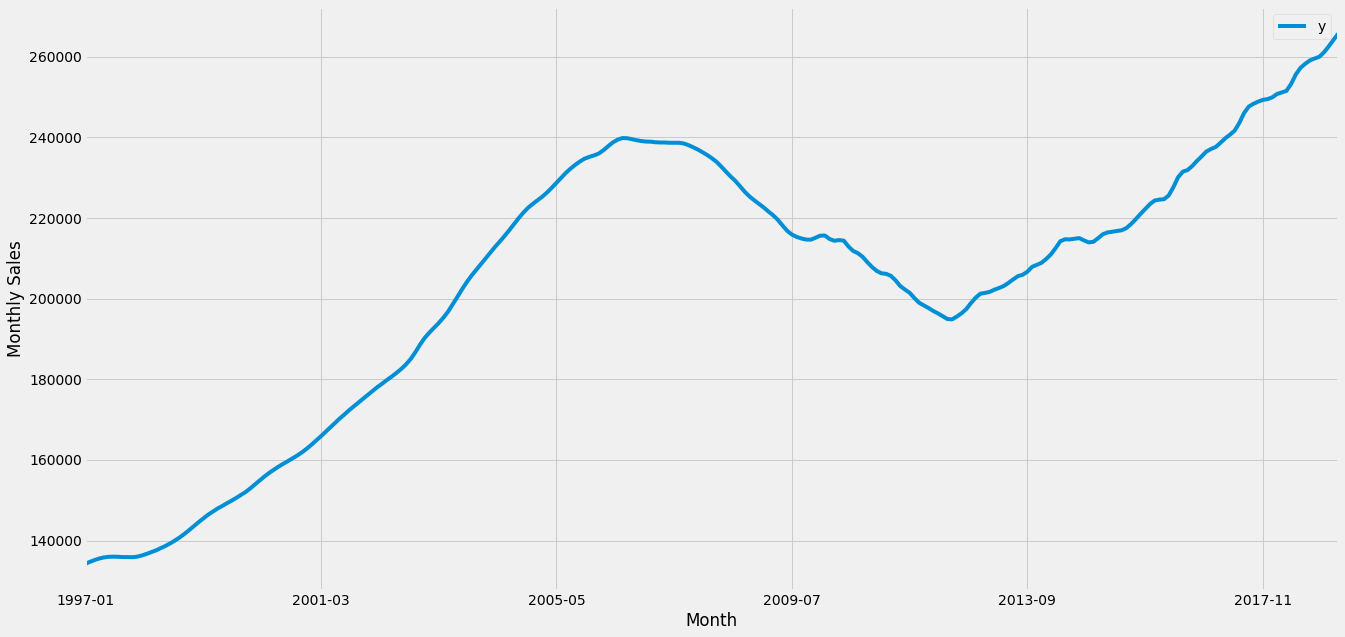

In [51]:
ax = WAKA.set_index('ds').plot(figsize=(20, 10))
ax.set_ylabel('Monthly Sales')
ax.set_xlabel('Month')

plt.show()

In [52]:
# MODEL
# Set the uncertainty interval to 95% (the Prophet default is 80%)

bev_model = Prophet(interval_width=0.95)
bev_model.fit(WAKA)

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [53]:
future_dates = bev_model.make_future_dataframe(periods=24, freq='M')
future_dates.tail()

,ds
286,2020-10-31
287,2020-11-30
288,2020-12-31
289,2021-01-31
290,2021-02-28


In [54]:
# MODEL

forecast = bev_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
286,2020-10-31,283053.810640,263311.812794,301108.699438
287,2020-11-30,283950.299511,263141.364319,303294.676326
288,2020-12-31,284742.982879,262303.834294,305722.012984
289,2021-01-31,285345.788285,261709.363867,307120.511894
290,2021-02-28,287376.107908,262311.297065,311164.419323


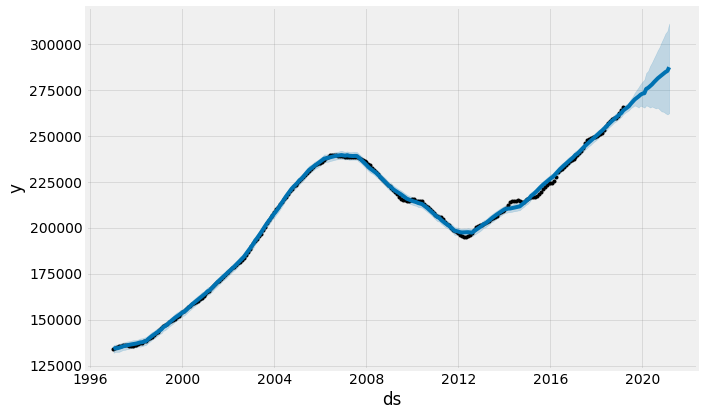

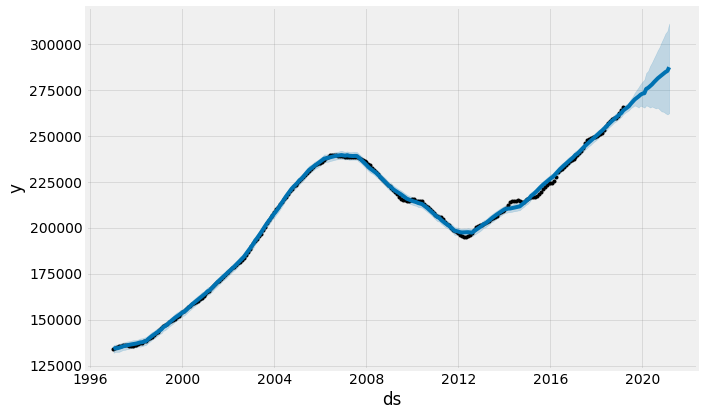

In [55]:
# MODEL

bev_model.plot(forecast, uncertainty=True)

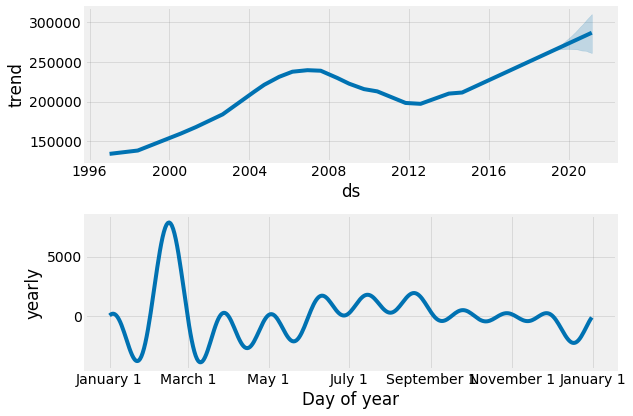

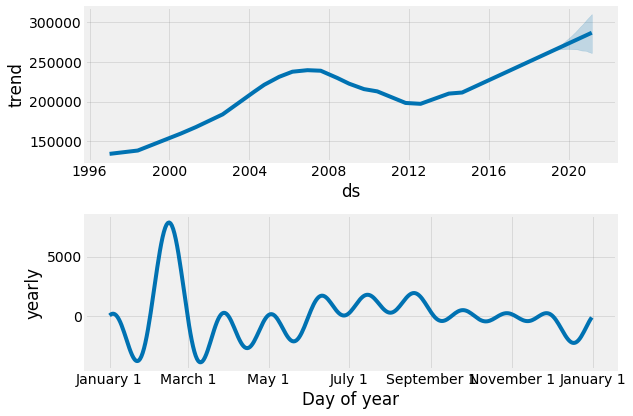

In [56]:
# INTERPRET

bev_model.plot_components(forecast)


In [57]:
data.loc[data['City'] == 'Appleton']

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03
1370,81972,54915,Appleton,WI,Appleton,Outagamie County,1371,107400.0,107200.0,106800.0,...,171900,173300,175400,177100,178000,178700,179500,180100,180800,181600
2633,81971,54914,Appleton,WI,Appleton,Outagamie County,2634,102700.0,102200.0,101600.0,...,160200,160900,160900,161800,164000,165800,166800,167800,168700,169000
3775,81968,54911,Appleton,WI,Appleton,Outagamie County,3776,91100.0,91100.0,91000.0,...,138500,139500,140900,142400,144500,146600,148400,149700,150600,151200
4995,81970,54913,Appleton,WI,Appleton,Outagamie County,4996,114300.0,115300.0,116300.0,...,275100,278400,280900,282000,283000,284400,286000,286900,287500,288400


In [0]:
APPL = data.loc[(data['City'] == 'Appleton') & (data['State'] == 'WI')]

APPL = APPL.groupby(['City','State'])['1997-01','1997-02','1997-03','1997-04','1997-05','1997-06','1997-07','1997-08','1997-09','1997-10','1997-11','1997-12',
                             '1998-01','1998-02','1998-03','1998-04','1998-05','1998-06','1998-07','1998-08','1998-09','1998-10','1998-11','1998-12',
                             '1999-01','1999-02','1999-03','1999-04','1999-05','1999-06','1999-07','1999-08','1999-09','1999-10','1999-11','1999-12',
                             '2000-01','2000-02','2000-03','2000-04','2000-05','2000-06','2000-07','2000-08','2000-09','2000-10','2000-11','2000-12',
                             '2001-01','2001-02','2001-03','2001-04','2001-05','2001-06','2001-07','2001-08','2001-09','2001-10','2001-11','2001-12',
                             '2002-01','2002-02','2002-03','2002-04','2002-05','2002-06','2002-07','2002-08','2002-09','2002-10','2002-11','2002-12',
                             '2003-01','2003-02','2003-03','2003-04','2003-05','2003-06','2003-07','2003-08','2003-09','2003-10','2003-11','2003-12',
                             '2004-01','2004-02','2004-03','2004-04','2004-05','2004-06','2004-07','2004-08','2004-09','2004-10','2004-11','2004-12',
                             '2005-01','2005-02','2005-03','2005-04','2005-05','2005-06','2005-07','2005-08','2005-09','2005-10','2005-11','2005-12',
                             '2006-01','2006-02','2006-03','2006-04','2006-05','2006-06','2006-07','2006-08','2006-09','2006-10','2006-11','2006-12',
                             '2007-01','2007-02','2007-03','2007-04','2007-05','2007-06','2007-07','2007-08','2007-09','2007-10','2007-11','2007-12',
                             '2008-01','2008-02','2008-03','2008-04','2008-05','2008-06','2008-07','2008-08','2008-09','2008-10','2008-11','2008-12',
                             '2009-01','2009-02','2009-03','2009-04','2009-05','2009-06','2009-07','2009-08','2009-09','2009-10','2009-11','2009-12',
                             '2010-01','2010-02','2010-03','2010-04','2010-05','2010-06','2010-07','2010-08','2010-09','2010-10','2010-11','2010-12',
                             '2011-01','2011-02','2011-03','2011-04','2011-05','2011-06','2011-07','2011-08','2011-09','2011-10','2011-11','2011-12',
                             '2012-01','2012-02','2012-03','2012-04','2012-05','2012-06','2012-07','2012-08','2012-09','2012-10','2012-11','2012-12',
                             '2013-01','2013-02','2013-03','2013-04','2013-05','2013-06','2013-07','2013-08','2013-09','2013-10','2013-11','2013-12',
                             '2014-01','2014-02','2014-03','2014-04','2014-05','2014-06','2014-07','2014-08','2014-09','2014-10','2014-11','2014-12',
                             '2015-01','2015-02','2015-03','2015-04','2015-05','2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12',
                             '2016-01','2016-02','2016-03','2016-04','2016-05','2016-06','2016-07','2016-08','2016-09','2016-10','2016-11','2016-12',
                             '2017-01','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07','2017-08','2017-09','2017-10','2017-11','2017-12',
                             '2018-01','2018-02','2018-03','2018-04','2018-05','2018-06','2018-07','2018-08','2018-09','2018-10','2018-11','2018-12',
                             '2019-01','2019-02','2019-03'].mean()

In [59]:
APPL = pd.melt(APPL, value_vars=['1997-01','1997-02','1997-03','1997-04','1997-05','1997-06','1997-07','1997-08','1997-09','1997-10','1997-11','1997-12',
                             '1998-01','1998-02','1998-03','1998-04','1998-05','1998-06','1998-07','1998-08','1998-09','1998-10','1998-11','1998-12',
                             '1999-01','1999-02','1999-03','1999-04','1999-05','1999-06','1999-07','1999-08','1999-09','1999-10','1999-11','1999-12',
                             '2000-01','2000-02','2000-03','2000-04','2000-05','2000-06','2000-07','2000-08','2000-09','2000-10','2000-11','2000-12',
                             '2001-01','2001-02','2001-03','2001-04','2001-05','2001-06','2001-07','2001-08','2001-09','2001-10','2001-11','2001-12',
                             '2002-01','2002-02','2002-03','2002-04','2002-05','2002-06','2002-07','2002-08','2002-09','2002-10','2002-11','2002-12',
                             '2003-01','2003-02','2003-03','2003-04','2003-05','2003-06','2003-07','2003-08','2003-09','2003-10','2003-11','2003-12',
                             '2004-01','2004-02','2004-03','2004-04','2004-05','2004-06','2004-07','2004-08','2004-09','2004-10','2004-11','2004-12',
                             '2005-01','2005-02','2005-03','2005-04','2005-05','2005-06','2005-07','2005-08','2005-09','2005-10','2005-11','2005-12',
                             '2006-01','2006-02','2006-03','2006-04','2006-05','2006-06','2006-07','2006-08','2006-09','2006-10','2006-11','2006-12',
                             '2007-01','2007-02','2007-03','2007-04','2007-05','2007-06','2007-07','2007-08','2007-09','2007-10','2007-11','2007-12',
                             '2008-01','2008-02','2008-03','2008-04','2008-05','2008-06','2008-07','2008-08','2008-09','2008-10','2008-11','2008-12',
                             '2009-01','2009-02','2009-03','2009-04','2009-05','2009-06','2009-07','2009-08','2009-09','2009-10','2009-11','2009-12',
                             '2010-01','2010-02','2010-03','2010-04','2010-05','2010-06','2010-07','2010-08','2010-09','2010-10','2010-11','2010-12',
                             '2011-01','2011-02','2011-03','2011-04','2011-05','2011-06','2011-07','2011-08','2011-09','2011-10','2011-11','2011-12',
                             '2012-01','2012-02','2012-03','2012-04','2012-05','2012-06','2012-07','2012-08','2012-09','2012-10','2012-11','2012-12',
                             '2013-01','2013-02','2013-03','2013-04','2013-05','2013-06','2013-07','2013-08','2013-09','2013-10','2013-11','2013-12',
                             '2014-01','2014-02','2014-03','2014-04','2014-05','2014-06','2014-07','2014-08','2014-09','2014-10','2014-11','2014-12',
                             '2015-01','2015-02','2015-03','2015-04','2015-05','2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12',
                             '2016-01','2016-02','2016-03','2016-04','2016-05','2016-06','2016-07','2016-08','2016-09','2016-10','2016-11','2016-12',
                             '2017-01','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07','2017-08','2017-09','2017-10','2017-11','2017-12',
                             '2018-01','2018-02','2018-03','2018-04','2018-05','2018-06','2018-07','2018-08','2018-09','2018-10','2018-11','2018-12',
                             '2019-01','2019-02','2019-03'])

APPL

,variable,value
0,1997-01,102900.0
1,1997-02,102700.0
2,1997-03,102350.0
3,1997-04,101925.0
4,1997-05,101450.0
5,1997-06,100950.0
6,1997-07,100450.0
7,1997-08,100050.0
8,1997-09,99725.0
9,1997-10,99450.0


In [60]:
APPL = APPL.rename(index=str, columns={"value": "y", "variable": "ds"})
APPL.head()

,ds,y
0,1997-01,102900.0
1,1997-02,102700.0
2,1997-03,102350.0
3,1997-04,101925.0
4,1997-05,101450.0


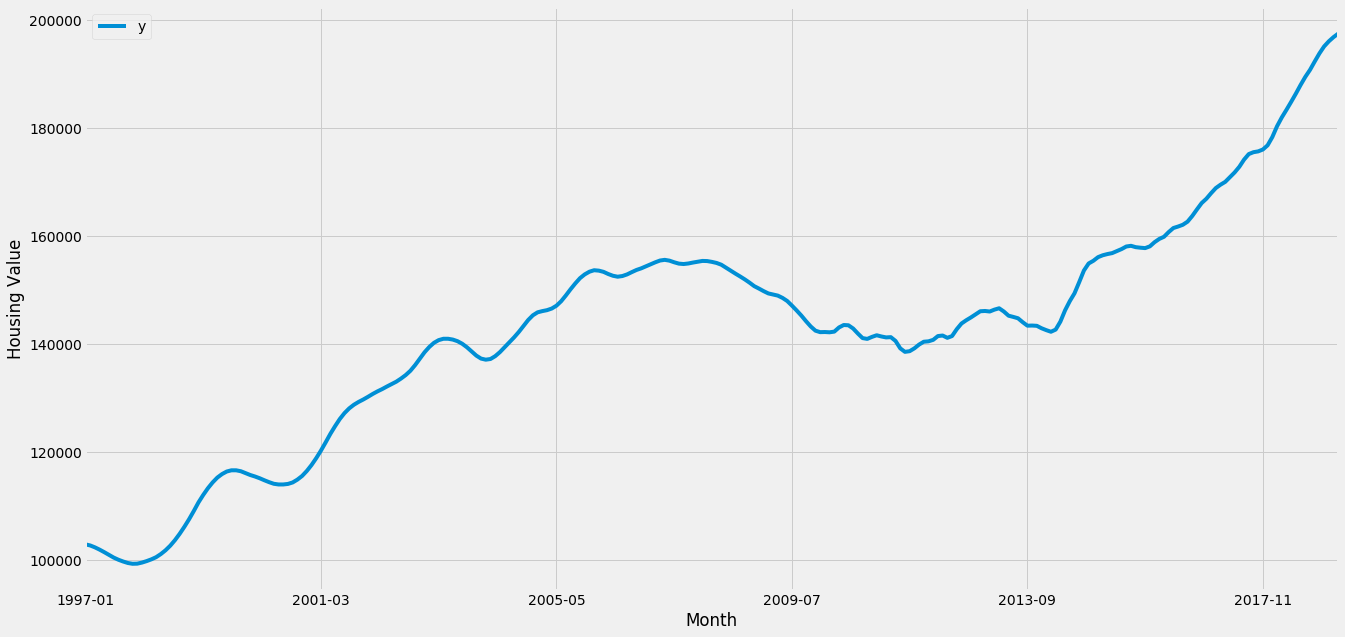

In [61]:
ax = APPL.set_index('ds').plot(figsize=(20, 10))
ax.set_ylabel('Housing Value')
ax.set_xlabel('Month')

plt.show()

In [62]:
# MODEL
# Set the uncertainty interval to 95% (the Prophet default is 80%)

bev_model = Prophet(interval_width=0.95)
bev_model.fit(APPL)

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [63]:
future_dates = bev_model.make_future_dataframe(periods=24, freq='M')
future_dates.tail()

,ds
286,2020-10-31
287,2020-11-30
288,2020-12-31
289,2021-01-31
290,2021-02-28


In [64]:
# MODEL

forecast = bev_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
286,2020-10-31,208255.286147,201396.324549,214372.576477
287,2020-11-30,209039.497090,201874.098780,215486.265044
288,2020-12-31,209175.115209,202292.128837,216208.601221
289,2021-01-31,209382.687058,201728.777110,215890.709623
290,2021-02-28,212637.700614,205352.461070,219699.718547


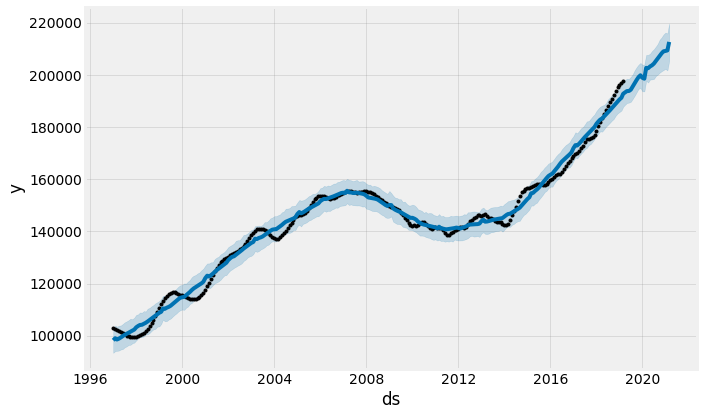

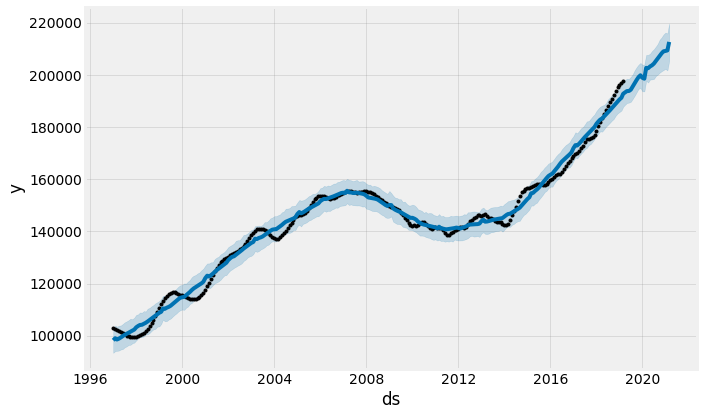

In [65]:
# MODEL

bev_model.plot(forecast, uncertainty=True)

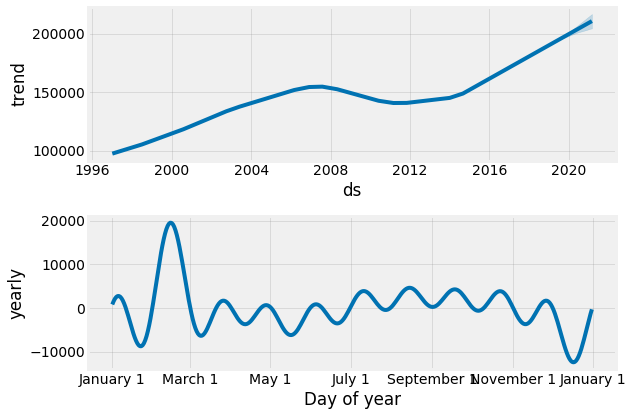

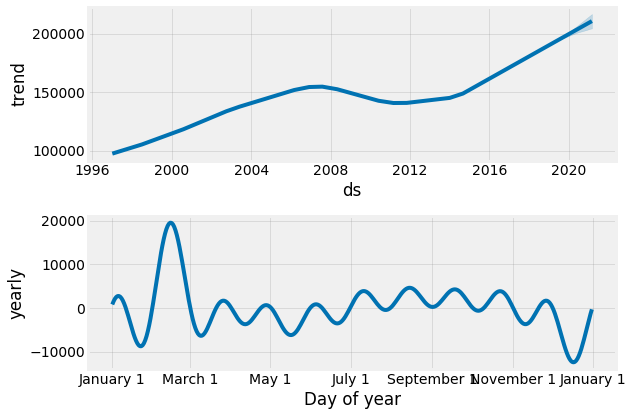

In [66]:
# INTERPRET

bev_model.plot_components(forecast)

In [70]:
WI = MIL.merge(MENF, 
                        left_on='ds', 
                        right_on='ds', 
                        how='inner', 
                        suffixes=["","_2"] #since they are the same name, we need a suffix
                       )

WI = WI.merge(WAKA, 
                        left_on='ds', 
                        right_on='ds', 
                        how='inner', 
                        suffixes=["","_3"] #since they are the same name, we need a suffix
                       )

WI = WI.merge(APPL, 
                        left_on='ds', 
                        right_on='ds', 
                        how='inner', 
                        suffixes=["","_4"] #since they are the same name, we need a suffix
                       )

WI.head()

,ds,y,y_2,y_3,y_4
0,1997-01,74846.153846,132900.0,134233.333333,102900.0
1,1997-02,75069.230769,133400.0,134733.333333,102700.0
2,1997-03,75246.153846,133800.0,135200.000000,102350.0
3,1997-04,75423.076923,134000.0,135566.666667,101925.0
4,1997-05,75607.692308,134200.0,135833.333333,101450.0


In [71]:
WI = WI.rename(index=str, columns={"y": "Milwaukee", "y_2": "Menomonee Falls", "y_3": "Waukesha", "y_4": "Appleton"})
WI.head()

,ds,Milwaukee,Menomonee Falls,Waukesha,Appleton
0,1997-01,74846.153846,132900.0,134233.333333,102900.0
1,1997-02,75069.230769,133400.0,134733.333333,102700.0
2,1997-03,75246.153846,133800.0,135200.000000,102350.0
3,1997-04,75423.076923,134000.0,135566.666667,101925.0
4,1997-05,75607.692308,134200.0,135833.333333,101450.0


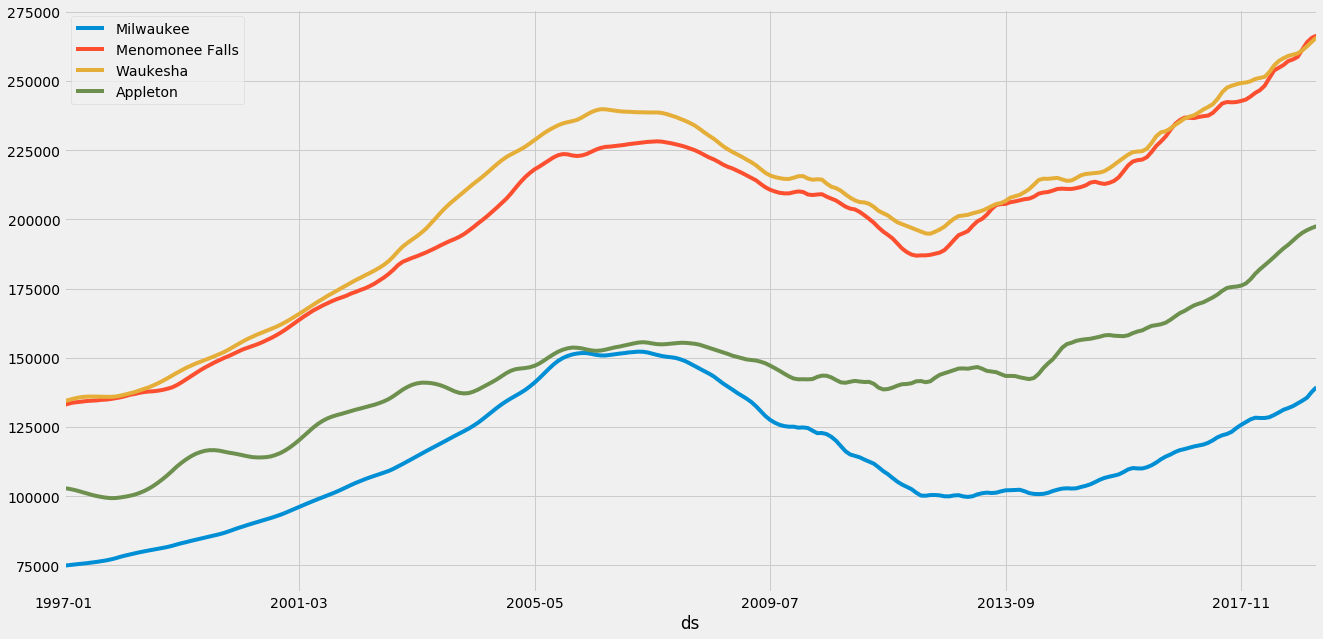

In [72]:
WI.set_index('ds').plot(figsize=(20,10), grid=True)